In [ ]:
#!cp /content/drive/MyDrive/Data/custom_coco.zip custom_coco.zip

In [ ]:
#!unzip custom_coco.zip

In [1]:
!wget https://data.mendeley.com/public-files/datasets/fpctx3svzd/files/a1b72a50-c2b0-4279-9541-37825a162ec5/file_downloaded

--2021-05-01 06:31:09--  https://data.mendeley.com/public-files/datasets/fpctx3svzd/files/a1b72a50-c2b0-4279-9541-37825a162ec5/file_downloaded
Resolving data.mendeley.com (data.mendeley.com)... 162.159.133.86, 162.159.130.86
Connecting to data.mendeley.com (data.mendeley.com)|162.159.133.86|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com/832ea908-43bd-44bc-8350-36c724a2ac1c [following]
--2021-05-01 06:31:10--  https://md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com/832ea908-43bd-44bc-8350-36c724a2ac1c
Resolving md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com (md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com)... 52.218.1.112
Connecting to md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com (md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com)|52.218.1.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3096743576 (2.9G) [applicatio

In [ ]:
!unzip /content/file_downloaded

In [3]:
main_folder = '/content/MYNursingHome'# '/content/MYNursingHome/'
import os

In [4]:
directory=os.listdir(main_folder)

In [5]:
correct_dirs = ['sofa','refrigerator','fan','bed','television','toilet_seat','table',
                'bench','chair','rack','cabinet','wardrobe','sink']

In [17]:
#rm -rf /content/test

In [6]:
import shutil
for i in directory:
  if i not in correct_dirs:
    shutil.rmtree(main_folder+'/'+i)

In [ ]:
# to be remove 
# /content/content/coco_images/clock
# /content/content/coco_images/"potted plant"
# /content/content/coco_images/toaster
# /content/content/coco_images/vase

In [38]:
!#rm -rf /content/resnet_model

In [9]:
import os
source1 = "/content/MYNursingHome/"
dest11 = "/content/test/"
dirs = os.listdir(source1)
import shutil
import numpy as np
for classes in dirs:
  os.mkdir(dest11+classes)
  files = os.listdir(source1+classes)
  for f in files:
    if np.random.rand(1) < 0.01:
        shutil.move(source1+classes+'/'+f, dest11+classes+'/'+ f)

In [12]:
#!ls /content/test/sofa -1 | wc -l

21


In [1]:
train_dir = '/content/MYNursingHome'#"/content/content/coco_images"

In [2]:
from keras.preprocessing.image import ImageDataGenerator

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,
    horizontal_flip=True,
    validation_split=0.10)
 # set validation split
# test_datagen = ImageDataGenerator(rescale=1./255,
#     horizontal_flip=True,
#     validation_split=0.5)

train_generator = train_datagen.flow_from_directory(
    train_dir,shuffle=True,
    target_size=(256, 256),
    batch_size=32,
    class_mode='sparse',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    train_dir,shuffle=True, # same directory as training data
    target_size=(256, 256),
    batch_size=32,
    class_mode='sparse',
    subset='validation') 

Found 17366 images belonging to 13 classes.
Found 1923 images belonging to 13 classes.


In [4]:
inv_map = {v: k for k, v in validation_generator.class_indices.items()}

In [ ]:
x= train_generator.next()
#print(x[0].shape)
for j,i in enumerate(x[0]):
    plt.imshow(i)
    plt.title(inv_map[x[1][j]])
    plt.show()
    

In [ ]:
# from tensorflow.keras.applications import imagenet_utils
# from tensorflow.keras.applications.inception_v3 import preprocess_input
# from tensorflow.keras.preprocessing.image import img_to_array
# from tensorflow.keras.preprocessing.image import load_img
# import numpy as np
# import argparse
# import cv2

In [ ]:
#from tensorflow.keras.applications import ResNet50

In [ ]:
# for layer in baseModel.layers:
#     layer.trainable = False

In [24]:
# example of tending the vgg16 model
from keras.applications.vgg16 import VGG16
#from keras.applications.resnet50 import ResNet50
#from keras.applications.inception_v3 import InceptionV3
from keras.models import Model
from keras.layers import Dense,BatchNormalization
from keras.layers import Flatten,Dropout
# load model without classifier layers vgg16
model = VGG16(include_top=False, input_shape=(256, 256, 3),pooling ='max') 
# load model resnet50 
#model = InceptionV3(include_top=False, input_shape=(256, 256, 3),pooling='max')

# load model
#model = ResNet50(include_top=False, input_shape=(256, 256, 3),weights='imagenet',pooling='max')
# for layer in model.layers:
#      layer.trainable = False
for layer in model.layers:
    if isinstance(layer, BatchNormalization): #need to reatrain batchnorm
        layer.trainable = True
    else:
        layer.trainable = False
# add new classifier layers
flat1 = Flatten()(model.layers[-1].output)
flat1b = BatchNormalization()(flat1)
#d0 = Dropout(rate=0.5)(flat1b) #Dense(4048, activation='relu')(flat1)
class1 = Dense(512, activation='relu')(flat1b)
#class1 = Dense(1024, activation='relu')(flat1b)
class1b = BatchNormalization()(class1)
d1 = Dropout(rate=0.5)(class1b)

class_1 = Dense( 512, activation='relu')(d1)
class_1b = BatchNormalization()(class_1)
d_1 = Dropout(rate=0.5)(class_1b)

#class2 = Dense(512, activation='relu')(class1)
class2 = Dense(256, activation='relu')(d_1)
class2b = BatchNormalization()(class2)
d2 = Dropout(rate=0.5)(class2b)

class3 = Dense(128, activation='relu')(d2)
class3b = BatchNormalization()(class3)

class4= Dense(64, activation='relu')(class3b)
class4b = BatchNormalization()(class4)

output = Dense(13,activation='softmax')(class4b)
# define new model
model1 = Model(inputs=model.inputs, outputs=output)
# summarize
model1.summary()

58892288/58889256 [==============================] - 1s 0us/step
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
____________________________________________________________

In [ ]:
model = InceptionV3(include_top=False, input_shape=(256, 256, 3),pooling='max')
for layer in model.layers:
    if isinstance(layer, BatchNormalization): #need to reatrain batchnorm
        layer.trainable = True
    else:
        layer.trainable = False
# add new classifier layers
flat1 = Flatten()(model.layers[-1].output)
flat1b = BatchNormalization()(flat1)
#d0 = Dropout(rate=0.5)(flat1b) #Dense(4048, activation='relu')(flat1)
class1 = Dense(512, activation='relu')(flat1b)
class1 = Dense(1024, activation='relu')(flat1b)
#class1b = BatchNormalization()(class1)
d1 = Dropout(rate=0.5)(class1b)

class_1 = Dense( 512, activation='relu')(d1)
class_1b = BatchNormalization()(class_1)
d_1 = Dropout(rate=0.5)(class_1b)

#class2 = Dense(512, activation='relu')(class1)
class2 = Dense(256, activation='relu')(d_1)
class2b = BatchNormalization()(class2)
d2 = Dropout(rate=0.5)(class2b)

class3 = Dense(128, activation='relu')(d2)
class3b = BatchNormalization()(class3)

class4= Dense(64, activation='relu')(class3b)
class4b = BatchNormalization()(class4)

output = Dense(13,activation='softmax')(class4b)
# define new model
model1 = Model(inputs=model.inputs, outputs=output)
# summarize
model1.summary()

In [ ]:
model = ResNet50(include_top=False, input_shape=(256, 256, 3),pooling='max')
for layer in model.layers:
    if isinstance(layer, BatchNormalization): #need to reatrain batchnorm
        layer.trainable = True
    else:
        layer.trainable = False
# add new classifier layers
flat1 = Flatten()(model.layers[-1].output)
flat1b = BatchNormalization()(flat1)
#d0 = Dropout(rate=0.5)(flat1b) #Dense(4048, activation='relu')(flat1)
class1 = Dense(512, activation='relu')(flat1b)
class1 = Dense(1024, activation='relu')(flat1b)
#class1b = BatchNormalization()(class1)
d1 = Dropout(rate=0.5)(class1b)

class_1 = Dense( 512, activation='relu')(d1)
class_1b = BatchNormalization()(class_1)
d_1 = Dropout(rate=0.5)(class_1b)

#class2 = Dense(512, activation='relu')(class1)
class2 = Dense(256, activation='relu')(d_1)
class2b = BatchNormalization()(class2)
d2 = Dropout(rate=0.5)(class2b)

class3 = Dense(128, activation='relu')(d2)
class3b = BatchNormalization()(class3)

class4= Dense(64, activation='relu')(class3b)
class4b = BatchNormalization()(class4)

output = Dense(13,activation='softmax')(class4b)
# define new model
model1 = Model(inputs=model.inputs, outputs=output)
# summarize
model1.summary()

In [6]:
from tensorflow import keras
# for layer in resnet.layers:
#     layer.trainable = False
opt = keras.optimizers.Adam(learning_rate=0.0001)

In [30]:
model1.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])
#model.summary()

In [31]:
history = model1.fit(
        train_generator,
        epochs=10,
        validation_data=validation_generator
        )

Epoch 1/10
543/543 [==============================] - 228s 402ms/step - loss: 1.7894 - accuracy: 0.4254 - val_loss: 0.3909 - val_accuracy: 0.8658
Epoch 2/10
543/543 [==============================] - 210s 386ms/step - loss: 0.6524 - accuracy: 0.7834 - val_loss: 0.2662 - val_accuracy: 0.9142
Epoch 3/10
543/543 [==============================] - 209s 385ms/step - loss: 0.4915 - accuracy: 0.8405 - val_loss: 0.2502 - val_accuracy: 0.9204
Epoch 4/10
543/543 [==============================] - 208s 384ms/step - loss: 0.4116 - accuracy: 0.8677 - val_loss: 0.2252 - val_accuracy: 0.9272
Epoch 5/10
543/543 [==============================] - 207s 382ms/step - loss: 0.3624 - accuracy: 0.8794 - val_loss: 0.2032 - val_accuracy: 0.9350
Epoch 6/10
543/543 [==============================] - 207s 382ms/step - loss: 0.3139 - accuracy: 0.8993 - val_loss: 0.1956 - val_accuracy: 0.9350
Epoch 7/10
543/543 [==============================] - 207s 381ms/step - loss: 0.3057 - accuracy: 0.9012 - val_loss: 0.2052 -

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [33]:
import json
with open('vgg.json', 'w') as file:
  json.dump(history.history, file)

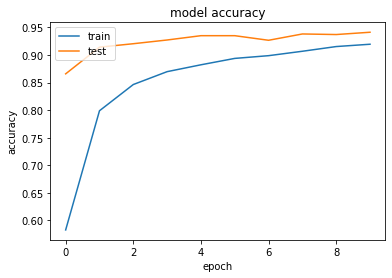

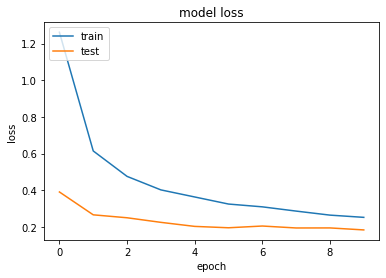

In [32]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [34]:
datagen = ImageDataGenerator(rescale=1./255,
    horizontal_flip=False)

test_generator = datagen.flow_from_directory(
        '/content/test',
        target_size=(256, 256),
        batch_size=1,
        class_mode='sparse',  # only data, no labels
        shuffle=False)

Found 211 images belonging to 13 classes.


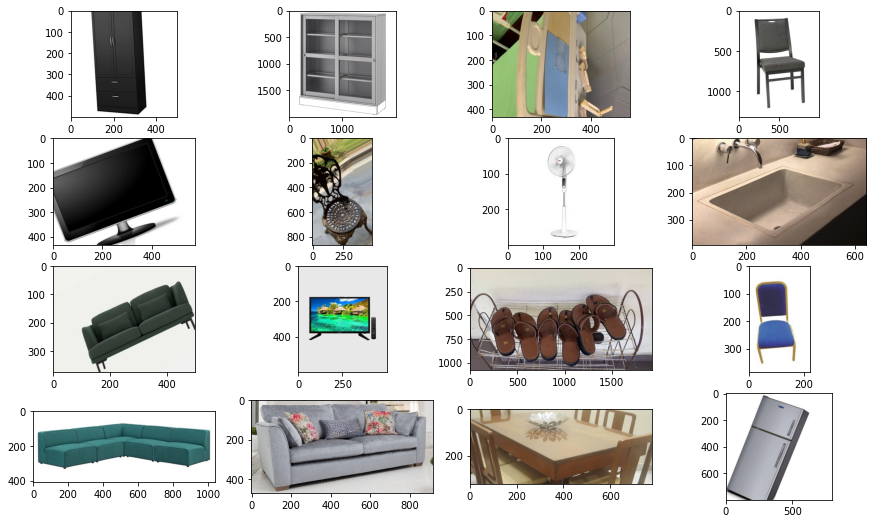

In [29]:
import random
from PIL import Image 
import os
import matplotlib.image as imgr
test_folder = "/content/test"
images = []
for folder in os.listdir(test_folder):
  for image in os.listdir(test_folder + '/' + folder):
    images.append(os.path.join(test_folder, folder, image))

plt.figure(1, figsize=(15, 9))
plt.axis('off')
n = 0
for i in range(16):
  n += 1
  random_img = random.choice(images)
  imgs = imgr.imread(random_img)
  plt.subplot(4, 4, n)
  #axis('off')
  plt.imshow(imgs)

plt.show()


In [35]:
y_pred_ohe = model1.predict(test_generator)

In [46]:
#y

In [ ]:
np.argmax(y_pred_ohe[1])

4

In [36]:
import numpy as np

In [37]:
y_pred_labels = np.argmax(y_pred_ohe, axis=1)

In [38]:
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())   

In [39]:
import sklearn.metrics as metrics

In [40]:
print(y_pred_labels[:50])

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1
  1  1  1  1  1  3  8  1  1  1  1  1  1  1 12  2  2  2  2 12  6  2  2 10
  2  2]


In [41]:
metrics.accuracy_score(true_classes,y_pred_labels)

0.933649289099526

In [ ]:
# for rem in range(0,12) :
#   if rem not in y_pred_labels:
#     print(rem)
#     print(inv_map[rem])

3
chair
11
toilet_seat


In [42]:
confusion_matrix = metrics.confusion_matrix(y_true=true_classes, y_pred=y_pred_labels)

In [ ]:
#class_labels.remove(inv_map[3])

In [43]:
print(metrics.classification_report( true_classes, y_pred_labels,target_names=class_labels))

              precision    recall  f1-score   support

         bed       0.95      1.00      0.97        19
       bench       0.89      0.89      0.89        19
     cabinet       0.85      0.73      0.79        15
       chair       0.91      0.95      0.93        21
         fan       1.00      1.00      1.00        12
        rack       1.00      0.88      0.93        16
refrigerator       0.87      0.93      0.90        14
        sink       1.00      1.00      1.00        10
        sofa       0.95      0.90      0.93        21
       table       1.00      1.00      1.00        15
  television       0.94      1.00      0.97        15
 toilet_seat       1.00      1.00      1.00        14
    wardrobe       0.86      0.90      0.88        20

    accuracy                           0.93       211
   macro avg       0.94      0.94      0.94       211
weighted avg       0.93      0.93      0.93       211



In [44]:

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=class_labels)


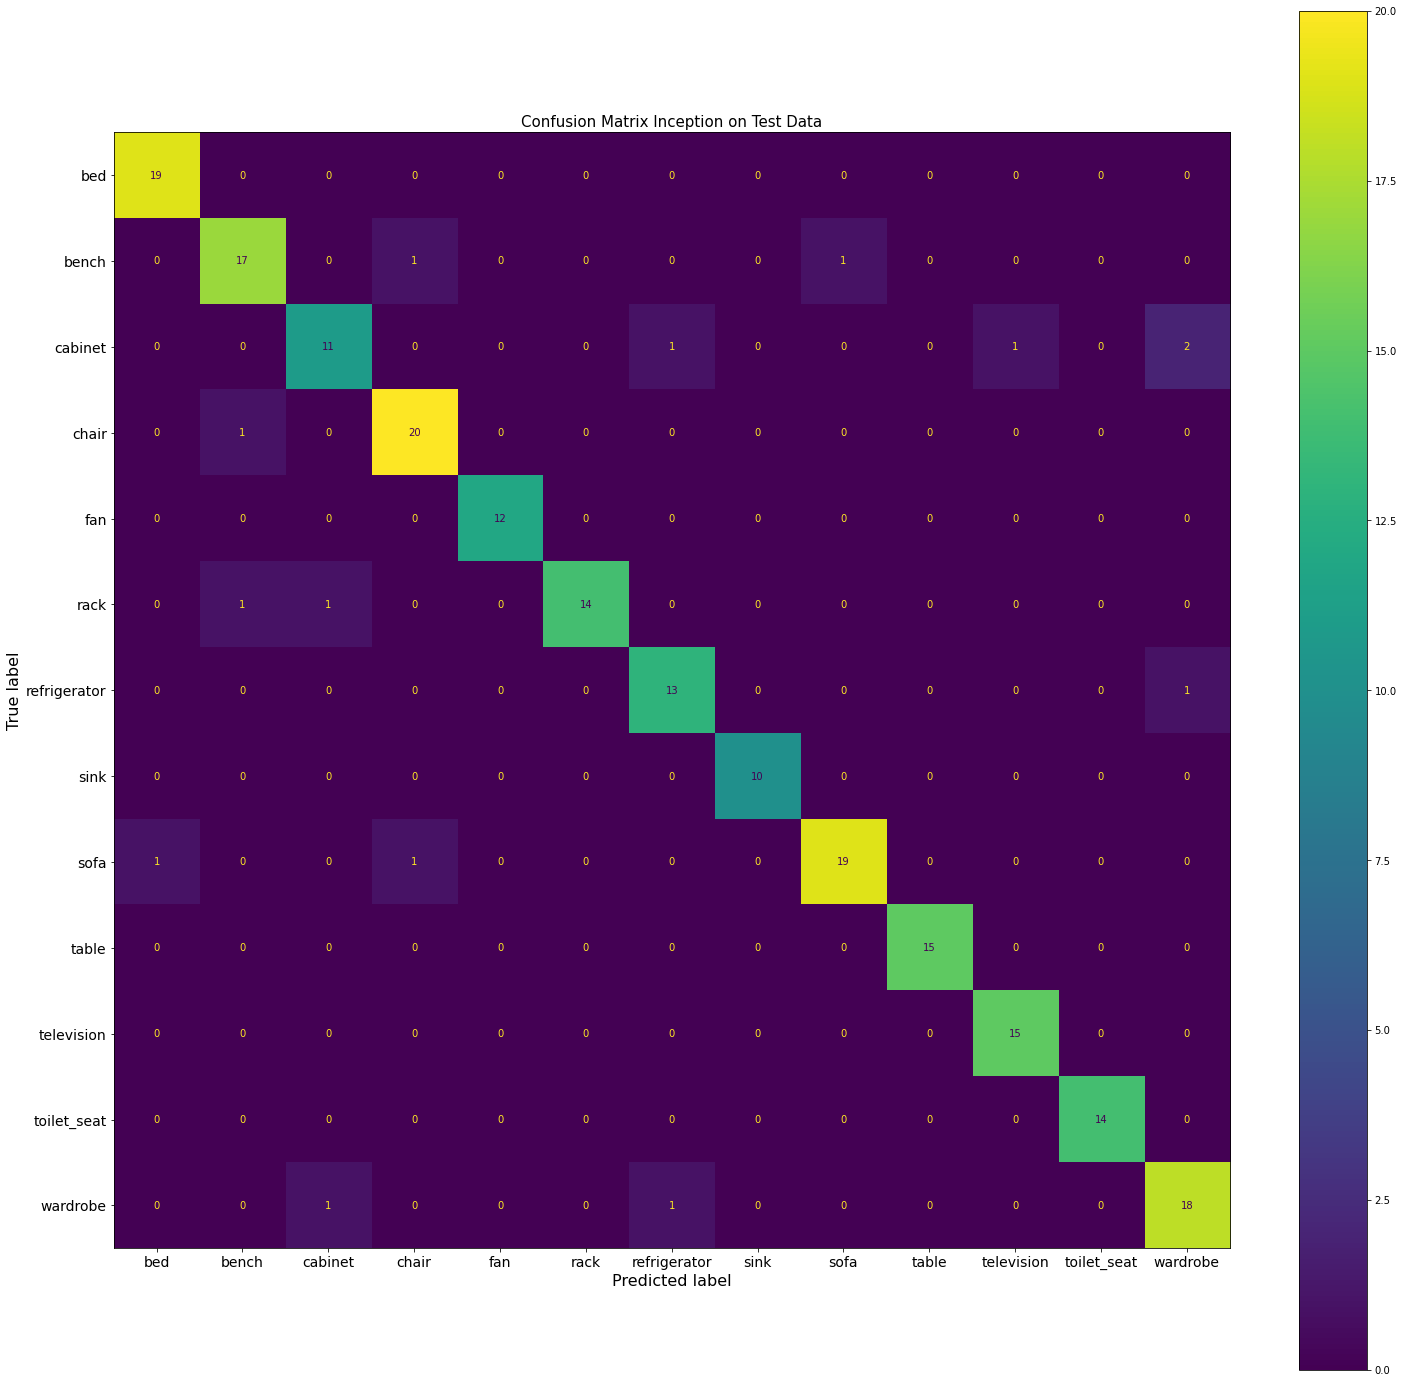

In [45]:
fig, ax = plt.subplots(figsize=(25, 25))
ax.set_title('Confusion Matrix Inception on Test Data', fontsize=15)
ax.set_xlabel('Predicted', fontsize=16)
ax.set_ylabel('True', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=14)
disp.plot(ax=ax)

In [33]:
model1.save('vgg_model')

INFO:tensorflow:Assets written to: resnet_model/assets


In [36]:
!zip -r vgg_pretrained.zip /content/vgg_model/

updating: content/resnet_model/ (stored 0%)
  adding: content/resnet_model/.zip (stored 0%)
  adding: content/resnet_model/saved_model.pb (deflated 93%)
  adding: content/resnet_model/assets/ (stored 0%)
  adding: content/resnet_model/variables/ (stored 0%)
  adding: content/resnet_model/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: content/resnet_model/variables/variables.index (deflated 81%)


In [37]:
#new_model = tf.keras.models.load_model('saved_model/my_model')